In [84]:
#- This Script is to contruct random forest based classification models using bacterial counts in Smokeres with and without Head and Neck Cancer
#- Author: Ashok Kumar Sharma
# https://cancerpreventionresearch.aacrjournals.org/content/13/5/463

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from calour.training import plot_scatter, plot_roc, plot_cm
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import math

from matplotlib import pyplot
%matplotlib inline


In [2]:
# Only single time
#!pip install git+git://github.com/amnona/dbbact-calour

In [13]:
import calour as ca
%matplotlib notebook
import importlib

In [14]:
#-- If needed choose a rarefied depth to normalize the data
dat=ca.read_amplicon('feature-table.biom',
                     'Metadata.tsv',
                     normalize=None,min_reads=1000)
# To check the data structure
#dat.sample_metadata
#dat.feature_metadata

2020-11-11 10:17:32 WARNING These have metadata but do not have data - dropped: {'#q2:types'}


In [15]:
#Remove ASVs having less number of reads¶
dat=dat.filter_abundance(100)

<IPython.core.display.Javascript object>


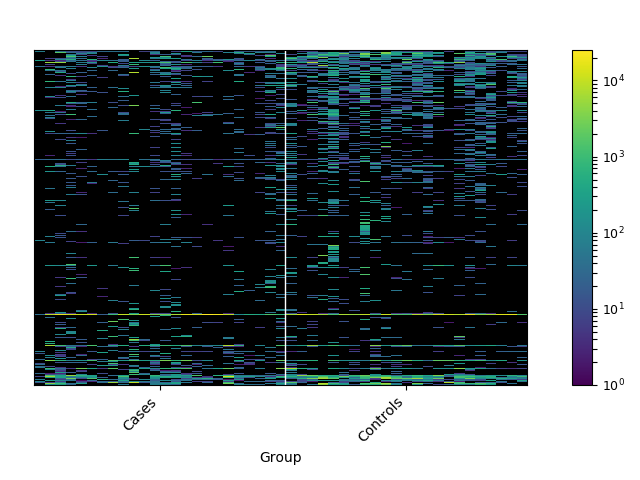

Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px', overflow_y='auto'))

In [17]:
#-- To check the distribution of bacterial species across samples in Different Groups
dat.sort_samples('Group').sort_centroid(n=0.001).plot(sample_field='Group', gui='jupyter')

In [18]:
dat.sample_metadata['Group'].value_counts()

Cases       24
Controls    23
Name: Group, dtype: int64

In [20]:
#- Random forest classification
it = dat.classify('Group', RandomForestClassifier(random_state=0), cv=RepeatedStratifiedKFold(5, 3), params=[{'n_estimators':3}, {'n_estimators': 500}])
res1 = next(it)
#res1.head()

<IPython.core.display.Javascript object>


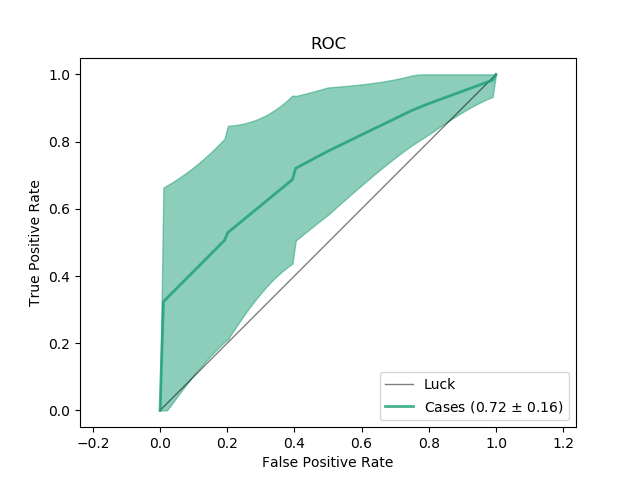

In [24]:
plot_roc(res1, pos_label='Cases')

<IPython.core.display.Javascript object>


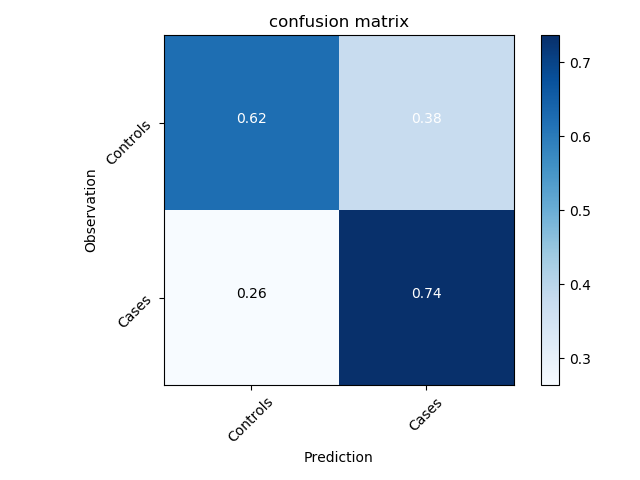

In [25]:
plot_cm(res1,normalize=True)


In [37]:
#--- Load the feature table again txt file along with the Metadata
df = pd.read_csv("feature_table.csv")
# take a look at the dataset
#df.head()

In [54]:
X=df.iloc[:,6:1468]
y=df['Group']
#X.shape
#y.shape

In [57]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [59]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [60]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [109]:
#---- To calculate Feature importance
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

In [79]:
#----- To do the correalation Analysis between Microbial richness and Diverstiy vs HPB RELEASING ADDUCT
alpha_div = pd.read_csv("Richness_total.csv")

# take a look at the dataset
#alpha_div.head()

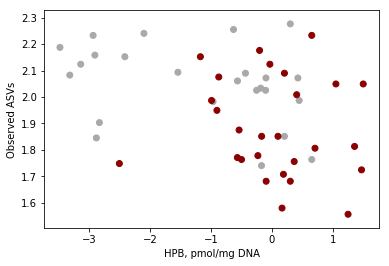

In [95]:
colors = {'Controls':'darkgray', 'Cases':'darkred'}
#plt.scatter(np.log10(alpha_div.Observed), np.log10(alpha_div.HPB_pmol_mg_DNA),  color='blue')
plt.scatter(np.log10(alpha_div.HPB_pmol_mg_DNA), np.log10(alpha_div.Observed), c= alpha_div['Group'].map(colors))
plt.xlabel("HPB, pmol/mg DNA")
plt.ylabel("Observed ASVs")
plt.show()

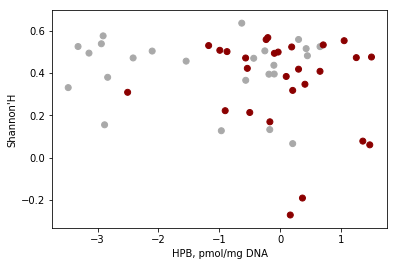

In [96]:
colors = {'Controls':'darkgray', 'Cases':'darkred'}
#plt.scatter(np.log10(alpha_div.Shannon), np.log10(alpha_div.HPB_pmol_mg_DNA),  color='blue')
plt.scatter(np.log10(alpha_div.HPB_pmol_mg_DNA), np.log10(alpha_div.Shannon), c= alpha_div['Group'].map(colors))
plt.xlabel("HPB, pmol/mg DNA")
plt.ylabel("Shannon'H")
plt.show()

/Users/ashoksharma/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


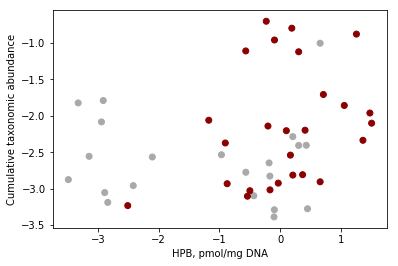

In [103]:
#-- Taxa enriched in Cases
Case_enrich = pd.read_csv("Cases_taxa_rel_abundances.csv")
# take a look at the dataset
#Case_enrich.head()
colors = {'Controls':'darkgray', 'Cases':'darkred'}
#plt.scatter(np.log10(alpha_div.Shannon), np.log10(alpha_div.HPB_pmol_mg_DNA),  color='blue')
plt.scatter(np.log10(Case_enrich.HPB_pmol_per_mg_DNA), np.log10(Case_enrich.Cumulative_abundance), c= alpha_div['Group'].map(colors))
plt.xlabel("HPB, pmol/mg DNA")
plt.ylabel("Cumulative taxonomic abundance")
plt.show()

/Users/ashoksharma/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


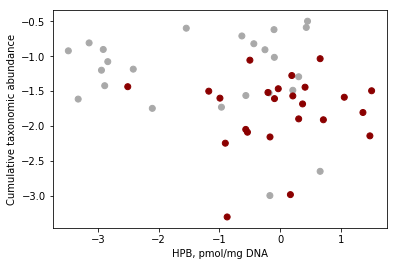

In [104]:
#-- Taxa enriched in Cases
Control_enrich = pd.read_csv("Control_taxa_rel_abundances.csv")
# take a look at the dataset
#Case_enrich.head()
colors = {'Controls':'darkgray', 'Cases':'darkred'}
#plt.scatter(np.log10(alpha_div.Shannon), np.log10(alpha_div.HPB_pmol_mg_DNA),  color='blue')
plt.scatter(np.log10(Control_enrich.HPB_pmol_per_mg_DNA), np.log10(Control_enrich.Cumulative_abundance), c= alpha_div['Group'].map(colors))
plt.xlabel("HPB, pmol/mg DNA")
plt.ylabel("Cumulative taxonomic abundance")
plt.show()